In [1023]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
%matplotlib inline

In [1024]:
housing = pd.read_csv("C:/Users/barry/Documents/Data/house_sales.csv")

In [1025]:
#Verify the data was loaded correctly
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1027]:
#I want to see what missing data I may have in the dataset
housing.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [1028]:
#Before I data wrangle this set, I need to know what data types are in each column
housing.dtypes

id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [1029]:
#Initial descriptive statistics prior to conducting any data wrangling
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1030]:
# To find the correlation among the columns 
housing.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.003478,0.002095,-0.011733,-0.133237,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.310823,0.526600,0.701579,0.088422,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.003478,0.310823,1.000000,0.515814,0.575974,0.028413,0.178472,-0.004474,0.082579,0.028169,0.359268,0.478380,0.302168,0.156249,0.019990,-0.154337,-0.009264,0.130509,0.392849,0.025323
bathrooms,0.002095,0.526600,0.515814,1.000000,0.754229,0.086867,0.501394,0.068412,0.186092,-0.125976,0.665890,0.685552,0.284030,0.507716,0.049887,-0.205680,0.027456,0.224369,0.569493,0.088615
sqft_living,-0.011733,0.701579,0.575974,0.754229,1.000000,0.168363,0.355316,0.107053,0.284038,-0.059371,0.763833,0.875966,0.432535,0.319783,0.057034,-0.199637,0.051092,0.239572,0.756901,0.181697
sqft_lot,-0.133237,0.088422,0.028413,0.086867,0.168363,1.000000,-0.005682,0.021173,0.074342,-0.009154,0.111713,0.181152,0.015569,0.052165,0.008996,-0.131311,-0.087750,0.229369,0.145112,0.728800
floors,0.018525,0.256794,0.178472,0.501394,0.355316,-0.005682,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.004474,0.068412,0.107053,0.021173,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.082579,0.186092,0.284038,0.074342,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028169,-0.125976,-0.059371,-0.009154,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [1031]:
#There is a lot of variability in sqft_living with a max of 12000 and min of 290. I don't want to use average or mode for NaN
#I want to use ML to predict the missing values of sqft_living
#I will need to exctract the NaN values into a dataframe and drop sqft_living from the train df
#I will use sqft_living15, sqft_above and grade as predictors for since they have the highest corr and do not contain NaN values
mldf = housing[['sqft_living15', 'sqft_above', 'grade', 'sqft_living']]
mldf.head()

,sqft_living15,sqft_above,grade,sqft_living
0,1340,1180,7,1180.0
1,1690,2170,7,2570.0
2,2720,770,6,770.0
3,1360,1050,7,1960.0
4,1800,1680,8,1680.0


In [1032]:
#Verify I have the df subset correctly with NaN values
mldf.isnull().sum()

sqft_living15       0
sqft_above          0
grade               0
sqft_living      1110
dtype: int64

In [1033]:
test_df= mldf[mldf["sqft_living"].isnull()]
print(test_df.shape)
test_df.head()

(1110, 4)


,sqft_living15,sqft_above,grade,sqft_living
10,2210,1860,8,NaN
12,1780,1430,7,NaN
23,1220,1070,7,NaN
32,1460,1510,7,NaN
37,1730,2360,8,NaN


In [1034]:
#Verify the 1110 NaN values have been dropped
mldf = mldf.dropna()
print(mldf.shape)

(20503, 4)


In [1035]:
#Set up the ML model axis
y_train = mldf['sqft_living']
x_train = mldf.drop('sqft_living', axis = 1)
x_test = test_df.drop('sqft_living', axis = 1)

In [1036]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [1037]:
#Calculate how to predict the y value
y_pred = lr.predict(x_test)

In [1038]:
#Add the y_pred back into my subset dataframe I used for ML
test_df['y_pred'] = y_pred
test_df

,sqft_living15,sqft_above,grade,sqft_living,y_pred
10,2210,1860,8,NaN,2230.068964
12,1780,1430,7,NaN,1700.824088
23,1220,1070,7,NaN,1312.980539
32,1460,1510,7,NaN,1672.317942
37,1730,2360,8,NaN,2444.157669
...,...,...,...,...,...
21492,1910,1910,8,NaN,2186.446563
21519,1220,880,8,NaN,1312.191692
21534,1720,1650,8,NaN,1961.676996
21542,1370,2630,9,NaN,2661.388176


In [1039]:
housing['sqft_living'].fillna(test_df['y_pred'], inplace = True)

In [1040]:
housing.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living         0
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [1041]:
#I will also take the same approach for sqft_lot
housing.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.003478,0.002095,-0.011312,-0.133237,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.310823,0.526600,0.700520,0.088422,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.003478,0.310823,1.000000,0.515814,0.572920,0.028413,0.178472,-0.004474,0.082579,0.028169,0.359268,0.478380,0.302168,0.156249,0.019990,-0.154337,-0.009264,0.130509,0.392849,0.025323
bathrooms,0.002095,0.526600,0.515814,1.000000,0.752026,0.086867,0.501394,0.068412,0.186092,-0.125976,0.665890,0.685552,0.284030,0.507716,0.049887,-0.205680,0.027456,0.224369,0.569493,0.088615
sqft_living,-0.011312,0.700520,0.572920,0.752026,1.000000,0.169639,0.361259,0.104371,0.281452,-0.063594,0.767271,0.880612,0.416079,0.323346,0.054374,-0.201680,0.051773,0.243799,0.760946,0.181361
sqft_lot,-0.133237,0.088422,0.028413,0.086867,0.169639,1.000000,-0.005682,0.021173,0.074342,-0.009154,0.111713,0.181152,0.015569,0.052165,0.008996,-0.131311,-0.087750,0.229369,0.145112,0.728800
floors,0.018525,0.256794,0.178472,0.501394,0.361259,-0.005682,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.004474,0.068412,0.104371,0.021173,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.082579,0.186092,0.281452,0.074342,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028169,-0.125976,-0.063594,-0.009154,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [1042]:
#The only variable that has a high correlation with sqft_lot is sqft_lot15, so I will use this to predict NaN values
mllot = housing[['sqft_lot', 'sqft_lot15']]
mllot.head()

,sqft_lot,sqft_lot15
0,5650.0,5650
1,7242.0,7639
2,10000.0,8062
3,5000.0,5000
4,8080.0,7503


In [1043]:
#Verify I have the df subset correctly with NaN values
mllot.isnull().sum()

sqft_lot      1044
sqft_lot15       0
dtype: int64

In [1044]:
test_lot= mllot[mllot["sqft_lot"].isnull()]
print(test_lot.shape)
test_lot.head()

(1044, 2)


,sqft_lot,sqft_lot15
23,NaN,8386
69,NaN,20158
95,NaN,6045
102,NaN,47777
111,NaN,3536


In [1045]:
#Verify the 1044 NaN values have been dropped
mllot = mllot.dropna()
print(mllot.shape)

(20569, 2)


In [1046]:
#Set up the ML model axis
y_train = mllot['sqft_lot']
x_train = mllot.drop('sqft_lot', axis = 1)
x_test = test_lot.drop('sqft_lot', axis = 1)

In [1047]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [1048]:
y_pred = lr.predict(x_test)

In [1049]:
test_lot['y_pred'] = y_pred
test_lot

,sqft_lot,sqft_lot15,y_pred
23,NaN,8386,10293.854576
69,NaN,20158,23206.662522
95,NaN,6045,7725.991562
102,NaN,47777,53502.180926
111,NaN,3536,4973.847905
...,...,...,...
21563,NaN,5123,6714.641840
21564,NaN,4650,6195.804076
21565,NaN,4563,6100.373029
21570,NaN,5019,6600.563347


In [1050]:
housing['sqft_lot'].fillna(test_lot['y_pred'], inplace = True)

In [1051]:
housing.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [1052]:
#Before making any updates based on mean, median or mode for the missing data, I want to see what outliers there are
#This will help me avoid creating spurious entries based on outliers of the data

housing['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,9286
4.0,6519
2.0,2617
5.0,1539
6.0,263
1.0,189
7.0,34
8.0,12
0.0,11
9.0,5


In [1053]:
#There is only 1 outlier in bedrooms (33).  Since bedrooms are integers, I will use mode anyways, which won't be affected by the outlier
print("Mode of bedrooms is % s" % (statistics.mode(housing['bedrooms'])))

Mode of bedrooms is 3.0


Text(0.5, 1.0, 'Boxplot of Bedrooms vs SqFt Living space')

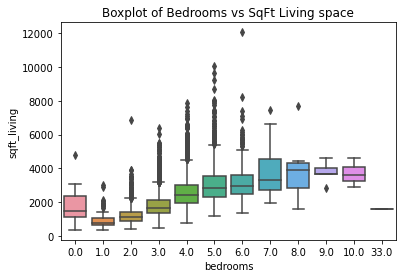

In [1054]:

sns.boxplot(x=housing['bedrooms'], y=housing['sqft_living'])
plt.title("Boxplot of Bedrooms vs SqFt Living space")

In [1055]:
#Some observations from the boxplot of Bedrooms vs SqFt Living Space:
#Bedrooms (33) appears to be a data entry typo and should be replaced. 
#I will replace (33) with (3) since it has the same sqft_living space as a 3 bdrm and 3 is the mode of bedrooms as well
#There is a lot of overlap for sqft_living space by bedrooms, making it difficult to determine how to repalce missing values


In [1056]:
#Returning to the bedrooms issue from before, I need to replace 33 with 3 since it is a data entry error
housing["bedrooms"] = housing["bedrooms"].replace(33.0, 3.0, regex=True)

#check that the value has been replaced
housing['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,9287
4.0,6519
2.0,2617
5.0,1539
6.0,263
1.0,189
7.0,34
8.0,12
0.0,11
9.0,5


In [1057]:
#I want to look at correlations between all of the variables again to see how to solve for NaN in bedrooms and bathrooms
housing.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.004794,0.002095,-0.011312,-0.132142,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.318373,0.526600,0.700520,0.088464,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.004794,0.318373,1.000000,0.530558,0.588458,0.028402,0.184539,-0.004450,0.085195,0.024955,0.369402,0.492133,0.308876,0.161578,0.020842,-0.159061,-0.010992,0.135205,0.404490,0.026450
bathrooms,0.002095,0.526600,0.530558,1.000000,0.752026,0.086502,0.501394,0.068412,0.186092,-0.125976,0.665890,0.685552,0.284030,0.507716,0.049887,-0.205680,0.027456,0.224369,0.569493,0.088615
sqft_living,-0.011312,0.700520,0.588458,0.752026,1.000000,0.169105,0.361259,0.104371,0.281452,-0.063594,0.767271,0.880612,0.416079,0.323346,0.054374,-0.201680,0.051773,0.243799,0.760946,0.181361
sqft_lot,-0.132142,0.088464,0.028402,0.086502,0.169105,1.000000,-0.006572,0.022069,0.074643,-0.007780,0.111096,0.180962,0.014829,0.052471,0.008094,-0.130525,-0.086882,0.228625,0.146513,0.734000
floors,0.018525,0.256794,0.184539,0.501394,0.361259,-0.006572,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.004450,0.068412,0.104371,0.022069,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.085195,0.186092,0.281452,0.074643,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.024955,-0.125976,-0.063594,-0.007780,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [1058]:
#bathrooms and sqft_living have a 0.749 correlation, but the boxplots show a lot of overlap. 
#I want to change the view and look at bathrooms by bin size for sqft_living as a histogram to find another method

housing['sqft_bins'] = pd.cut(housing['sqft_living'], bins = [0, 2000, 4000, 6000, 8000, 10000, float('Inf')], labels = ["0-2000", "2000-4000", "4000-6000", "6000-8000", "8000-10000", "above 10000"])

In [1059]:
#Verify the data column was correctly built
housing.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_bins
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0-2000
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2000-4000
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0-2000
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0-2000
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0-2000
5,7237550310,20140512T000000,1225000,4.0,4.50,5420.0,101930.0,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,4000-6000
6,1321400060,20140627T000000,257500,3.0,2.25,1715.0,6819.0,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0-2000
7,2008000270,20150115T000000,291850,3.0,1.50,1060.0,9711.0,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,0-2000
8,2414600126,20150415T000000,229500,3.0,1.00,1780.0,7470.0,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,0-2000
9,3793500160,20150312T000000,323000,3.0,2.50,1890.0,6560.0,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,0-2000


array([[<AxesSubplot:title={'center':'0-2000'}>,
        <AxesSubplot:title={'center':'2000-4000'}>],
       [<AxesSubplot:title={'center':'4000-6000'}>,
        <AxesSubplot:title={'center':'6000-8000'}>],
       [<AxesSubplot:title={'center':'8000-10000'}>,
        <AxesSubplot:title={'center':'above 10000'}>]], dtype=object)

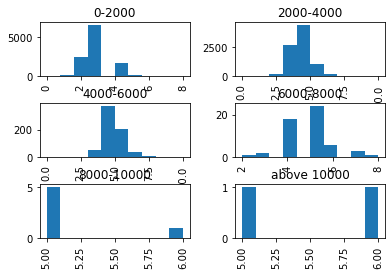

In [1060]:
#Now to visualize the bedroom histogram based on sqft_bins

#I can see I have relatively gaussian distributions except for large sqft homes, meaning these bins are well chosen for bedrooms
housing['bedrooms'].hist(by=housing['sqft_bins'])

In [1061]:
#create a list to append into based on values for sqft_living in the housing df
#Based on the histogram, I will replace Nan bedrooms <=2000 with 3.0, >2000 but <8000, with 4.0 and 8000 or higher with 5.0
bed_assign = []

for row in housing['sqft_living']:
    if row <= 2000:    
        bed_assign.append(3.0)
    elif 2000 < row < 8000:
        bed_assign.append(4.0)
    elif row >= 8000:   
        bed_assign.append(5.0)

In [1062]:
housing['bed_assign'] = bed_assign
housing.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_bins,bed_assign
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0-2000,3.0
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2000-4000,4.0
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,0-2000,3.0
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,0-2000,3.0
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,0-2000,3.0
5,7237550310,20140512T000000,1225000,4.0,4.50,5420.0,101930.0,1.0,0,0,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,4000-6000,4.0
6,1321400060,20140627T000000,257500,3.0,2.25,1715.0,6819.0,2.0,0,0,...,0,1995,0,98003,47.3097,-122.327,2238,6819,0-2000,3.0
7,2008000270,20150115T000000,291850,3.0,1.50,1060.0,9711.0,1.0,0,0,...,0,1963,0,98198,47.4095,-122.315,1650,9711,0-2000,3.0
8,2414600126,20150415T000000,229500,3.0,1.00,1780.0,7470.0,1.0,0,0,...,730,1960,0,98146,47.5123,-122.337,1780,8113,0-2000,3.0
9,3793500160,20150312T000000,323000,3.0,2.50,1890.0,6560.0,2.0,0,0,...,0,2003,0,98038,47.3684,-122.031,2390,7570,0-2000,3.0


In [1063]:
#Now that I have created a column with the bedroom values I want to impute for NaN, I can write a code to copy them

housing.bedrooms.fillna(housing.bed_assign,inplace = True)

In [1064]:
#check that the value has been replaced - the 3.0, 4.0 and 5.0 bedrooms should increase
housing['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,9905
4.0,7034
2.0,2617
5.0,1540
6.0,263
1.0,189
7.0,34
8.0,12
0.0,11
9.0,5


<AxesSubplot:>

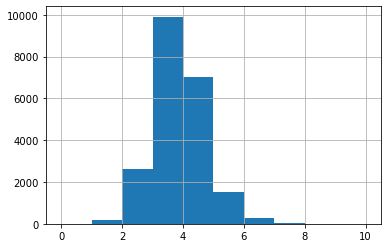

In [1065]:
#I want to visualize this result to see if it has a bell shaped curve for distribution
housing["bedrooms"].hist()

In [1066]:
#The histogram result is good, so I will keep the values I have calculated and replaced for NaN

In [1067]:
#The last variable with missing data is bathrooms
housing.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms        1068
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sqft_bins           0
bed_assign          0
dtype: int64

array([[<AxesSubplot:title={'center':'0-2000'}>,
        <AxesSubplot:title={'center':'2000-4000'}>],
       [<AxesSubplot:title={'center':'4000-6000'}>,
        <AxesSubplot:title={'center':'6000-8000'}>],
       [<AxesSubplot:title={'center':'8000-10000'}>,
        <AxesSubplot:title={'center':'above 10000'}>]], dtype=object)

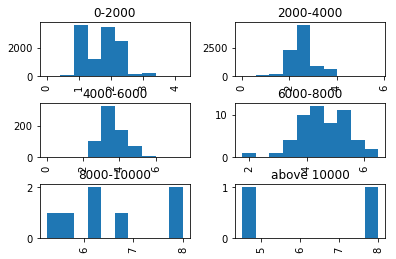

In [1068]:
#I will visualize bathrooms in the same was as I did for bedrooms:

#I find a relatively gaussian distribution except for the large sqft homes, this means I have chosen good bins to visualize bathrooms
housing['bathrooms'].hist(by=housing['sqft_bins'])

In [1069]:
#check the values of bathrooms prior to imputing to the NaN values:
housing['bathrooms'].value_counts().to_frame()

,bathrooms
2.50,5115
1.00,3667
1.75,2901
2.25,1951
2.00,1828
1.50,1383
2.75,1121
3.00,713
3.50,690
3.25,558


<AxesSubplot:>

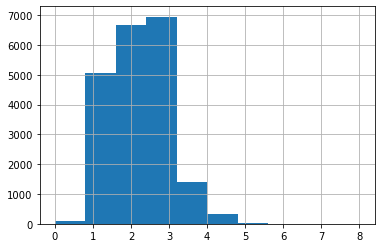

In [1070]:
#I want to visualize the bathrooms prior to chaning NaN values to see how the distribution changes
housing["bathrooms"].hist()

In [1071]:
#It appears to be skewed right, but honestly most homes have 1-3 bedrooms so I think this is an accurate reflection 

In [1072]:
'''The distribution for bathrooms will also have a 3-level approach:
if 0-6000 : 3 bathrooms
if 6000-8000: 4 bathrooms
if above 8000: 6 bathrooms'''

#create a list to append into based on values for sqft_living in the housing df (using 3 if <=4000sqft and 5 if above 4000sqft)
bath_assign = []

for row in housing['sqft_living']:
    if row <= 6000:    
        bath_assign.append(3.0)
    elif 2000 < row < 8000:
        bath_assign.append(4.0)
    elif row >= 8000:   
        bath_assign.append(6.0)

In [1073]:
#Check that the code created the df appropriately:
housing['bath_assign'] = bath_assign
housing.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_bins,bed_assign,bath_assign
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0-2000,3.0,3.0
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2000-4000,4.0,3.0
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0-2000,3.0,3.0
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,0-2000,3.0,3.0
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,0-2000,3.0,3.0
5,7237550310,20140512T000000,1225000,4.0,4.50,5420.0,101930.0,1.0,0,0,...,2001,0,98053,47.6561,-122.005,4760,101930,4000-6000,4.0,3.0
6,1321400060,20140627T000000,257500,3.0,2.25,1715.0,6819.0,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,0-2000,3.0,3.0
7,2008000270,20150115T000000,291850,3.0,1.50,1060.0,9711.0,1.0,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,0-2000,3.0,3.0
8,2414600126,20150415T000000,229500,3.0,1.00,1780.0,7470.0,1.0,0,0,...,1960,0,98146,47.5123,-122.337,1780,8113,0-2000,3.0,3.0
9,3793500160,20150312T000000,323000,3.0,2.50,1890.0,6560.0,2.0,0,0,...,2003,0,98038,47.3684,-122.031,2390,7570,0-2000,3.0,3.0


In [1074]:
#Now that I have created a column with the bathroom values I want to impute for NaN, I can write a code to copy them

housing.bathrooms.fillna(housing.bath_assign,inplace = True)

In [1075]:
#check that the value has been replaced - the 3, 4 and 6 bathrooms should increase
housing['bathrooms'].value_counts().to_frame()

,bathrooms
2.50,5115
1.00,3667
1.75,2901
2.25,1951
2.00,1828
3.00,1778
1.50,1383
2.75,1121
3.50,690
3.25,558


<AxesSubplot:>

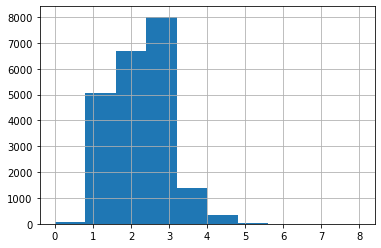

In [1076]:
#I want to visualize this result to see if it has a bell shaped curve for distribution after replacing NaN values
housing["bathrooms"].hist()

In [1077]:
#The result is very similar to before replacing NaN values meaning I don't think I skewed the accuracy of the data 

In [1078]:
#Verify the missing values have all been replaced
housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_bins        0
bed_assign       0
bath_assign      0
dtype: int64

In [1079]:
#I want to look at the view column since it should be binary
housing.view.unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [1080]:
#I want to convert the values of 2, 3 and 4 to Nan so I can use ML to repalce the values with 0 or 1 instead of dropping the rows
housing['view'].replace(2 ,np.NaN, inplace = True)
housing['view'].replace(3 ,np.NaN, inplace = True)
housing['view'].replace(4 ,np.NaN, inplace = True)
housing.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view             1792
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sqft_bins           0
bed_assign          0
bath_assign         0
dtype: int64

In [1081]:
#Subset a view dataframe with variables that have a high corr with view
viewdf = housing[['price', 'waterfront', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'grade', 'sqft_basement', 'sqft_living15', 'view']]
viewdf.head()

,price,waterfront,sqft_living,sqft_lot,bedrooms,bathrooms,grade,sqft_basement,sqft_living15,view
0,221900,0,1180.0,5650.0,3.0,1.00,7,0,1340,0.0
1,538000,0,2570.0,7242.0,3.0,2.25,7,400,1690,0.0
2,180000,0,770.0,10000.0,2.0,1.00,6,0,2720,0.0
3,604000,0,1960.0,5000.0,4.0,3.00,7,910,1360,0.0
4,510000,0,1680.0,8080.0,3.0,2.00,8,0,1800,0.0


In [1082]:
viewdf.shape

(21613, 10)

In [1083]:
test_viewdf= viewdf[viewdf["view"].isnull()]
print(test_viewdf.shape)
test_viewdf.head()

(1792, 10)


,price,waterfront,sqft_living,sqft_lot,bedrooms,bathrooms,grade,sqft_basement,sqft_living15,view
15,650000,0,2950.0,5000.0,4.0,3.00,9,970,2140,NaN
21,2000000,0,3050.0,44867.0,3.0,2.75,9,720,4110,NaN
49,1350000,1,2753.0,65005.0,3.0,2.50,9,588,2680,NaN
58,951000,0,3250.0,14342.0,5.0,3.25,8,0,2960,NaN
60,650000,0,2150.0,21235.0,3.0,2.25,8,560,2570,NaN


In [1084]:
#Verify the 1792 NaN values have been dropped
viewdf = viewdf.dropna()
print(viewdf.shape)

(19821, 10)


In [1085]:
#Set up the ML model axis
y_train = viewdf['view']
x_train = viewdf.drop('view', axis = 1)
x_test = test_viewdf.drop('view', axis = 1)

In [1086]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [1087]:
y_pred = lg.predict(x_test)

In [1088]:
test_viewdf['y_pred'] = y_pred
test_viewdf

,price,waterfront,sqft_living,sqft_lot,bedrooms,bathrooms,grade,sqft_basement,sqft_living15,view,y_pred
15,650000,0,2950.0,5000.0,4.0,3.00,9,970,2140,NaN,0.0
21,2000000,0,3050.0,44867.0,3.0,2.75,9,720,4110,NaN,0.0
49,1350000,1,2753.0,65005.0,3.0,2.50,9,588,2680,NaN,0.0
58,951000,0,3250.0,14342.0,5.0,3.25,8,0,2960,NaN,0.0
60,650000,0,2150.0,21235.0,3.0,2.25,8,560,2570,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21554,388000,0,2198.0,6222.0,3.0,2.50,8,0,2198,NaN,0.0
21576,3567000,1,4850.0,10584.0,5.0,4.50,10,1310,3470,NaN,1.0
21579,645000,0,1730.0,1229.0,3.0,3.00,9,410,1710,NaN,0.0
21593,1088000,0,4170.0,8142.0,5.0,3.75,10,0,3030,NaN,0.0


In [1089]:
test_viewdf['y_pred']=test_viewdf['y_pred'].astype('int')
test_viewdf

,price,waterfront,sqft_living,sqft_lot,bedrooms,bathrooms,grade,sqft_basement,sqft_living15,view,y_pred
15,650000,0,2950.0,5000.0,4.0,3.00,9,970,2140,NaN,0
21,2000000,0,3050.0,44867.0,3.0,2.75,9,720,4110,NaN,0
49,1350000,1,2753.0,65005.0,3.0,2.50,9,588,2680,NaN,0
58,951000,0,3250.0,14342.0,5.0,3.25,8,0,2960,NaN,0
60,650000,0,2150.0,21235.0,3.0,2.25,8,560,2570,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
21554,388000,0,2198.0,6222.0,3.0,2.50,8,0,2198,NaN,0
21576,3567000,1,4850.0,10584.0,5.0,4.50,10,1310,3470,NaN,1
21579,645000,0,1730.0,1229.0,3.0,3.00,9,410,1710,NaN,0
21593,1088000,0,4170.0,8142.0,5.0,3.75,10,0,3030,NaN,0


In [1090]:
housing['view'].fillna(test_viewdf['y_pred'], inplace = True)
housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_bins        0
bed_assign       0
bath_assign      0
dtype: int64

In [1091]:
#I will drop some rows now that are not beneficial for future analysis, such as the columns I added and 'id'
housing.drop(["id", "bed_assign", "bath_assign", "sqft_bins"], axis = 1, inplace = True)
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1092]:
#I noticed that the date column is not in a format we would use to describe data. I needs to be converted to years, months, days, etc
housing["date"] = pd.to_datetime(housing.date)
housing["year"] = housing.date.dt.year
housing["month"] = housing.date.dt.month
housing["day"] = housing.date.dt.day
housing["day_of_week"] = housing.date.dt.day_name()

In [1093]:
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,day_of_week
0,2014-10-13,221900,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,Monday
1,2014-12-09,538000,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,Tuesday
2,2015-02-25,180000,2.0,1.00,770.0,10000.0,1.0,0,0.0,3,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,Wednesday
3,2014-12-09,604000,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,Tuesday
4,2015-02-18,510000,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,Wednesday


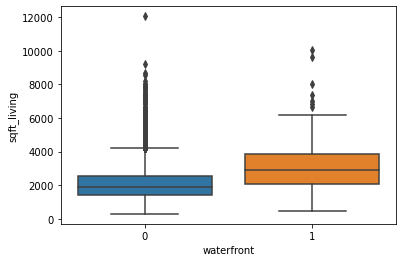

In [1094]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="waterfront", y="sqft_living", data=housing)
plt.show()

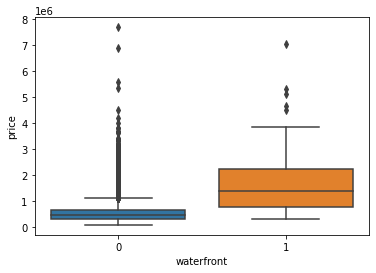

In [1095]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="waterfront", y="price", data=housing)
plt.show()

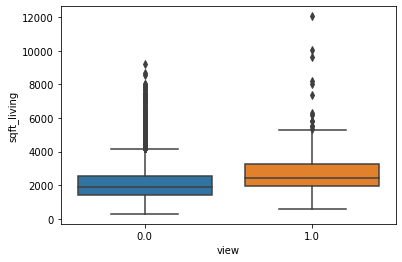

In [1096]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="view", y="sqft_living", data=housing)
plt.show()

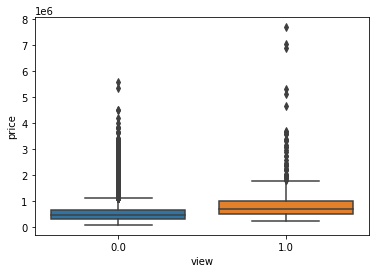

In [1097]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="view", y="price", data=housing)
plt.show()

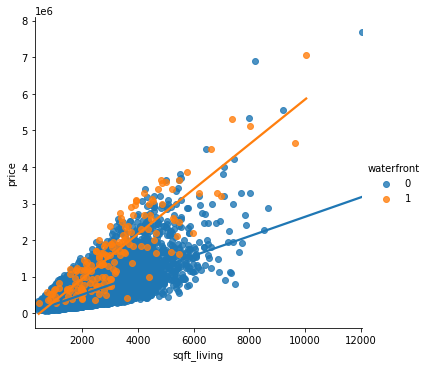

In [1098]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
sns.lmplot(x ="sqft_living", y ="price", hue = "waterfront", data = housing, order = 1, ci = None)

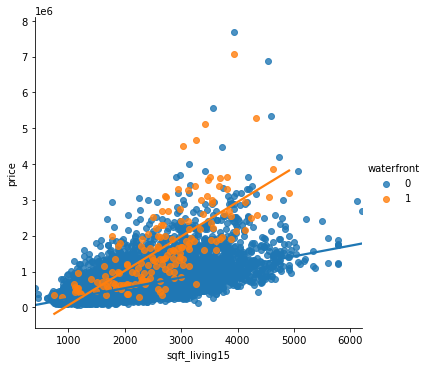

In [1099]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
sns.lmplot(x ="sqft_living15", y ="price", hue = "waterfront", data = housing, order = 1, ci = None)

In [1100]:
#It seems there are some outliers in price.  I want to look at these more closely
housing['price'].quantile([0.25,0.5,0.75])

0.25    321950.0
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64

In [1101]:
#The interquartile range is:
Q3 = np.quantile(housing['price'], 0.75)
Q1 = np.quantile(housing['price'], 0.25)
IQR = Q3 - Q1
 
print("IQR value for column price is", (IQR))

IQR value for column price is 323050.0


In [1102]:
#It seems there are some outliers in price.  I want to look at these more closely
outlier_list = []
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
for x in housing['price']: 
        if ((x < lower_range) or (x > upper_range)):
            outlier_list.append(x)
    
outliers = pd.DataFrame(outlier_list)
print(outliers)

            0
0     1225000
1     2000000
2     1350000
3     1325000
4     1450000
...       ...
1141  1700000
1142  3567000
1143  1222500
1144  1575000
1145  1537000

[1146 rows x 1 columns]


In [1103]:
#This analysis produces a lot of results, I am going to try 5x IQR to narrow down high outliers
outlier_list = []
lower_range = Q1 - 5 * IQR
upper_range = Q3 + 5 * IQR
for x in housing['price']: 
        if ((x < lower_range) or (x > upper_range)):
            outlier_list.append(x)
    
outliers = pd.DataFrame(outlier_list)
print(outliers)

           0
0    2400000
1    2900000
2    3075000
3    2384000
4    3070000
..       ...
141  2300000
142  2900000
143  2351960
144  3000000
145  3567000

[146 rows x 1 columns]


In [1104]:
#I want to subset the outliers so I can eventually see how different they are to the original
housing_outliers = housing[housing['price'].isin(outlier_list)]
print(housing_outliers)

            date    price  bedrooms  bathrooms  sqft_living     sqft_lot  \
246   2014-09-29  2400000       4.0       2.50       3650.0   8354.00000   
269   2015-05-04  2900000       4.0       3.25       5050.0  23099.16548   
300   2014-06-24  3075000       4.0       5.00       4550.0  18641.00000   
312   2014-05-02  2384000       5.0       2.50       3650.0   9050.00000   
656   2014-11-20  3070000       3.0       2.50       3930.0  55867.00000   
...          ...      ...       ...        ...          ...          ...   
20767 2015-04-17  2300000       4.0       4.00       4360.0   8175.00000   
21040 2014-11-13  2900000       5.0       4.00       5190.0  14600.00000   
21310 2014-07-03  2351960       4.0       4.25       5010.0  19412.00000   
21530 2015-04-07  3000000       4.0       3.75       5090.0  14823.00000   
21576 2015-01-07  3567000       5.0       4.50       4850.0  10584.00000   

       floors  waterfront  view  condition  ...  yr_renovated  zipcode  \
246       1.0

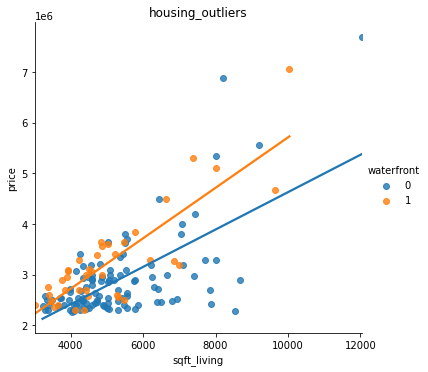

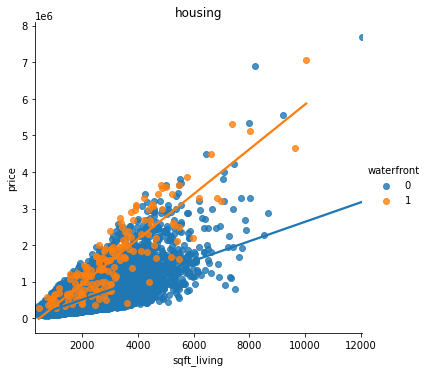

In [1105]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
sns.lmplot(x ="sqft_living", y ="price", hue = "waterfront", data = housing_outliers, order = 1, ci = None).set(title='housing_outliers')
sns.lmplot(x ="sqft_living", y ="price", hue = "waterfront", data = housing, order = 1, ci = None).set(title='housing')

In [1106]:
#Broadly speaking, the trend lines are similar which makes me confident there is a good sampling from 3x IQR.
#I can also tell that the high and low values have been selected which should help the model we create

In [1107]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.375792,2.157452,2080.209086,1.510101e+04,1.494309,0.007542,0.016194,3.409430,7.656873,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197
std,3.671272e+05,0.890856,0.774145,911.387201,4.080409e+04,0.539989,0.086517,0.126224,0.650743,1.175459,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1430.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,23.000000
max,7.700000e+06,10.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,1.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000


In [1108]:
housing_outliers.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,2.990857e+06,4.458904,3.943493,5231.076131,21948.573814,1.869863,0.267123,0.171233,3.465753,10.904110,...,1974.438356,314.917808,98059.301370,47.620258,-122.237329,3585.089041,18422.643836,2014.315068,6.671233,15.178082
std,8.886428e+05,0.910678,1.108653,1519.470487,27699.255959,0.487975,0.443980,0.378009,0.706271,1.091211,...,34.821312,730.775181,53.321325,0.046402,0.079354,770.978813,20560.437361,0.466142,3.003698,9.093905
min,2.271150e+06,2.000000,1.750000,3000.000000,3800.000000,1.000000,0.000000,0.000000,2.000000,8.000000,...,1904.000000,0.000000,98004.000000,47.455800,-122.410000,1680.000000,3800.000000,2014.000000,1.000000,1.000000
25%,2.450875e+06,4.000000,3.250000,4250.000000,11576.500000,2.000000,0.000000,0.000000,3.000000,10.000000,...,1941.000000,0.000000,98006.500000,47.591975,-122.283750,3022.500000,9046.000000,2014.000000,4.000000,8.000000
50%,2.710000e+06,4.000000,3.750000,4850.000000,16527.000000,2.000000,0.000000,0.000000,3.000000,11.000000,...,1991.000000,0.000000,98039.000000,47.626300,-122.228000,3565.000000,15934.500000,2014.000000,6.500000,13.000000
75%,3.192188e+06,5.000000,4.500000,5767.500000,23216.250000,2.000000,1.000000,0.000000,4.000000,12.000000,...,2003.000000,0.000000,98109.000000,47.638850,-122.211000,4000.000000,20000.000000,2015.000000,9.000000,23.000000
max,7.700000e+06,8.000000,8.000000,12050.000000,307752.000000,3.500000,1.000000,1.000000,5.000000,13.000000,...,2014.000000,2013.000000,98199.000000,47.749300,-121.982000,6210.000000,217800.000000,2015.000000,12.000000,30.000000


In [1109]:
#If I drop the outliers (#146) from the whole dataset (#21613) this represents only 0.7% of the data
houses = housing[~housing.price.isin(outlier_list)]
houses.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,day_of_week
0,2014-10-13,221900,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,Monday
1,2014-12-09,538000,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,Tuesday
2,2015-02-25,180000,2.0,1.00,770.0,10000.0,1.0,0,0.0,3,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,Wednesday
3,2014-12-09,604000,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,Tuesday
4,2015-02-18,510000,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,Wednesday
5,2014-05-12,1225000,4.0,4.50,5420.0,101930.0,1.0,0,0.0,3,...,0,98053,47.6561,-122.005,4760,101930,2014,5,12,Monday
6,2014-06-27,257500,3.0,2.25,1715.0,6819.0,2.0,0,0.0,3,...,0,98003,47.3097,-122.327,2238,6819,2014,6,27,Friday
7,2015-01-15,291850,3.0,1.50,1060.0,9711.0,1.0,0,0.0,3,...,0,98198,47.4095,-122.315,1650,9711,2015,1,15,Thursday
8,2015-04-15,229500,3.0,1.00,1780.0,7470.0,1.0,0,0.0,3,...,0,98146,47.5123,-122.337,1780,8113,2015,4,15,Wednesday
9,2015-03-12,323000,3.0,2.50,1890.0,6560.0,2.0,0,0.0,3,...,0,98038,47.3684,-122.031,2390,7570,2015,3,12,Thursday


In [1110]:
houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.146700e+04,21467.000000,21467.000000,21467.000000,2.146700e+04,21467.000000,21467.000000,21467.000000,21467.000000,21467.000000,...,21467.000000,21467.000000,21467.000000,21467.000000,21467.000000,21467.000000,21467.000000,21467.000000,21467.000000,21467.000000
mean,5.234201e+05,3.368426,2.145304,2058.779609,1.505444e+04,1.491755,0.005776,0.015140,3.409046,7.634788,...,1970.981786,82.834490,98078.066567,47.559643,-122.213737,1975.680626,12730.000745,2014.323007,6.573764,15.691666
std,2.987234e+05,0.886221,0.757119,867.580947,4.087535e+04,0.539441,0.075784,0.122111,0.650350,1.144924,...,29.332480,398.085936,53.485278,0.138892,0.141143,671.895127,27340.709875,0.467636,3.116110,8.631978
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,3.200000e+05,3.000000,1.750000,1430.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.469500,-122.329000,1480.000000,5100.000000,2014.000000,4.000000,8.000000
50%,4.500000e+05,3.000000,2.250000,1900.000000,7.661000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571000,-122.231000,1830.000000,7610.000000,2014.000000,6.000000,16.000000
75%,6.385000e+05,4.000000,2.500000,2530.000000,1.072287e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678250,-122.124000,2350.000000,10042.000000,2015.000000,9.000000,23.000000
max,2.260000e+06,10.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,1.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000,2015.000000,12.000000,31.000000


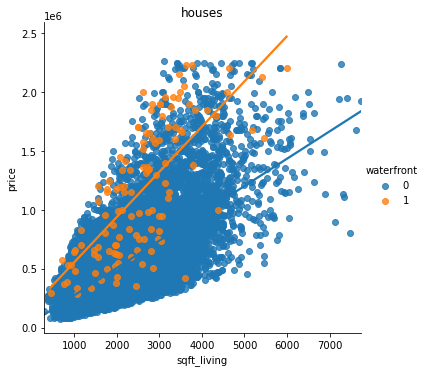

In [1111]:
sns.lmplot(x ="sqft_living", y ="price", hue = "waterfront", data = houses, order = 1, ci = None).set(title='houses')

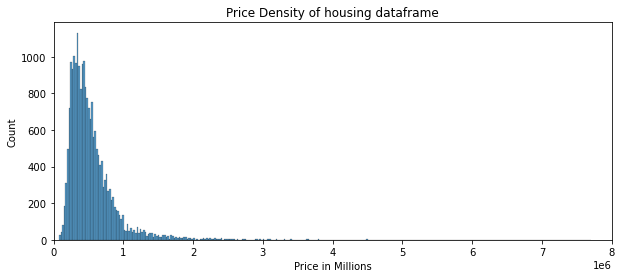

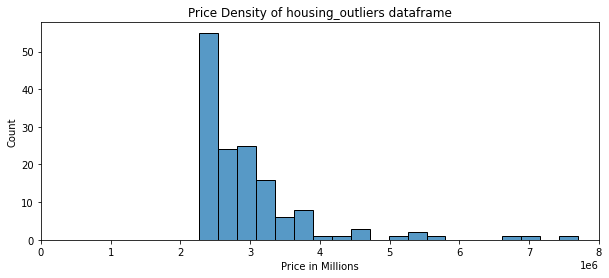

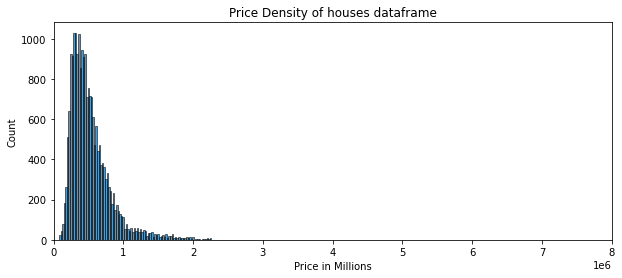

In [1112]:
#Exploratory analysis of the three different dataframes for comparison of outliers and final dataframe

#Original housing dataframe
plt.figure(figsize=(10,4))
price_dist = sns.histplot(housing["price"])
plt.xlim(0, 8000000)
price_dist.set(xlabel="Price in Millions", title="Price Density of housing dataframe")
plt.show()

#Outliers housing dataframe
plt.figure(figsize=(10,4))
price_dist = sns.histplot(housing_outliers["price"])
plt.xlim(0, 8000000)
price_dist.set(xlabel="Price in Millions", title="Price Density of housing_outliers dataframe")
plt.show()

#Final houses dataframe (3xICR removed)
plt.figure(figsize=(10,4))
price_dist = sns.histplot(houses["price"])
plt.xlim(0, 8000000)
price_dist.set(xlabel="Price in Millions", title="Price Density of houses dataframe")
plt.show()

In [1113]:
#Since I only removed 0.7% of the data, I am not surprised the final dataframe is so similar to the original, minus outliers

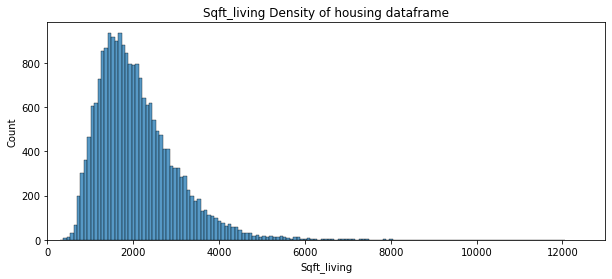

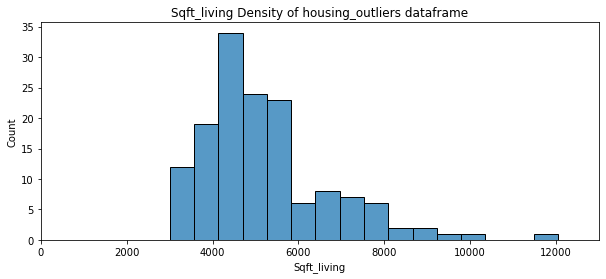

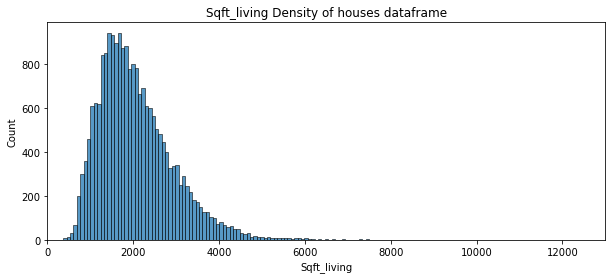

In [1114]:
#I want to see the same for sqft_living to see how this has changed as well
#Original housing dataframe
plt.figure(figsize=(10,4))
price_dist = sns.histplot(housing["sqft_living"])
plt.xlim(0, 13000)
price_dist.set(xlabel="Sqft_living", title="Sqft_living Density of housing dataframe")
plt.show()

#Outliers housing dataframe
plt.figure(figsize=(10,4))
price_dist = sns.histplot(housing_outliers["sqft_living"])
plt.xlim(0, 13000)
price_dist.set(xlabel="Sqft_living", title="Sqft_living Density of housing_outliers dataframe")
plt.show()

#Final houses dataframe (3xICR removed)
plt.figure(figsize=(10,4))
price_dist = sns.histplot(houses["sqft_living"])
plt.xlim(0, 13000)
price_dist.set(xlabel="Sqft_living", title="Sqft_living Density of houses dataframe")
plt.show()

In [1115]:
#Since I only removed 0.7% of the data, I am not surprised the final dataframe is so similar to the original, minus outliers

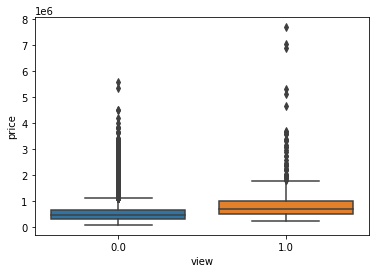

In [1116]:
#I noticed previously there were some outliers in price when I did a boxplot based on view.  How did this change after cleaning?
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="view", y="price", data=housing)
plt.show()

In [1117]:
#I still have these outliers, but that may be good.  Since I removed 5x IQR the ones remaining may help train the model

In [1118]:
#I want to process the data now to get it ready for machine learning
#I think it may be beneficial to have both bathrooms and bedrooms as categorical data

bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3,4), (4, 5), (5, 11)])
bedroom_bins = pd.cut(houses['bedrooms'],bins)
bedroom_bins.categories = ['< 1 bedroom','1 bedroom','2 bedrooms','3 bedrooms','4 bedrooms','5+ bedrooms']

bedroom_test = pd.get_dummies(bedroom_bins.cat.rename_categories(bedroom_bins.categories), drop_first=True)
bedroom_test

,1 bedroom,2 bedrooms,3 bedrooms,4 bedrooms,5+ bedrooms
0,0,1,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
21608,0,1,0,0,0
21609,0,0,1,0,0
21610,1,0,0,0,0
21611,0,1,0,0,0


In [1119]:
#Will do the same for bathrooms

bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3,4), (4, 5), (5, 8)])
bathroom_bins = pd.cut(houses['bathrooms'],bins)
bathroom_bins.categories = ['< 1 bath','1 bath','2 baths','3 baths','4 baths','5+ baths']

bathroom_test = pd.get_dummies(bathroom_bins.cat.rename_categories(bathroom_bins.categories), drop_first=True)
bathroom_test

,1 bath,2 baths,3 baths,4 baths,5+ baths
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
21608,0,1,0,0,0
21609,0,1,0,0,0
21610,0,0,0,0,0
21611,0,1,0,0,0


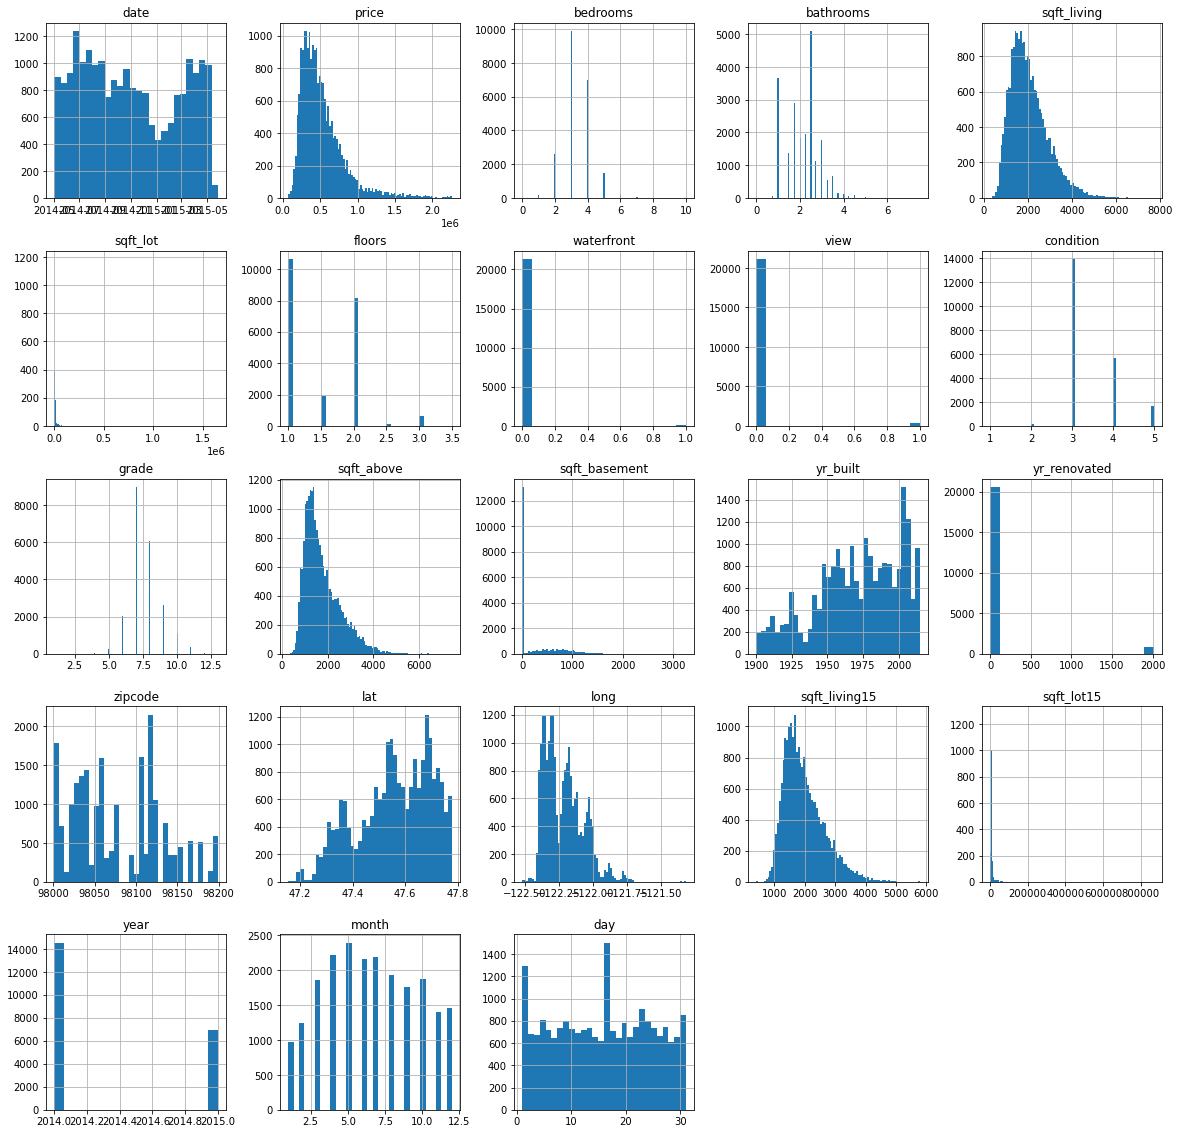

In [1120]:
#The last thing to do for data cleaning is to transform any variables with skewed data

# histogram of each numerical feature
houses.hist(bins = "auto", figsize = (20,20));

In [1121]:
houses.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
price,1.000000,0.325513,0.485314,0.682533,0.099015,0.277372,0.162567,0.100436,0.041282,0.680553,...,0.058692,0.121045,-0.044671,0.354114,0.036108,0.601474,0.089460,0.006925,-0.016588,-0.013209
bedrooms,0.325513,1.000000,0.493280,0.593515,0.030718,0.180490,-0.019897,0.019915,0.019710,0.363188,...,0.167490,0.017346,-0.158994,-0.012563,0.141799,0.401503,0.029465,-0.008618,0.000322,-0.008126
bathrooms,0.485314,0.493280,1.000000,0.698505,0.079819,0.476133,0.026373,0.032010,-0.124239,0.617296,...,0.492199,0.038970,-0.195439,0.018949,0.222690,0.525195,0.080598,-0.023821,0.006166,-0.005875
sqft_living,0.682533,0.593515,0.698505,1.000000,0.171965,0.362752,0.045418,0.063290,-0.067636,0.755804,...,0.338107,0.042006,-0.204649,0.043707,0.261059,0.758987,0.183941,-0.028409,0.010558,-0.005126
sqft_lot,0.099015,0.030718,0.079819,0.171965,1.000000,-0.007762,0.019780,-0.008158,-0.007390,0.110597,...,0.052470,0.007379,-0.130767,-0.087700,0.228699,0.146285,0.733313,0.003737,0.000628,0.000836
floors,0.277372,0.180490,0.476133,0.362752,-0.007762,1.000000,0.014839,-0.024272,-0.266850,0.459341,...,0.494108,0.004776,-0.059854,0.047546,0.127913,0.278089,-0.012512,-0.021482,0.013249,-0.005688
waterfront,0.162567,-0.019897,0.026373,0.045418,0.019780,0.014839,1.000000,0.000618,0.018222,0.038274,...,-0.034992,0.091556,0.044820,-0.025076,-0.051068,0.048954,0.029394,0.001245,0.002536,0.013262
view,0.100436,0.019915,0.032010,0.063290,-0.008158,-0.024272,0.000618,1.000000,0.021740,0.044881,...,-0.038044,0.033475,0.045874,0.017602,-0.064131,0.073966,-0.009303,0.004913,-0.003486,-0.001361
condition,0.041282,0.019710,-0.124239,-0.067636,-0.007390,-0.266850,0.018222,0.021740,1.000000,-0.149908,...,-0.360277,-0.059540,0.001088,-0.015383,-0.105883,-0.097071,-0.002725,-0.045697,0.021764,-0.004469
grade,0.680553,0.363188,0.617296,0.755804,0.110597,0.459341,0.038274,0.044881,-0.149908,1.000000,...,0.458134,0.005581,-0.184695,0.109079,0.207808,0.704720,0.118208,-0.031029,0.007434,-0.011635


In [1122]:
houses_log = houses

C:\Users\barry\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


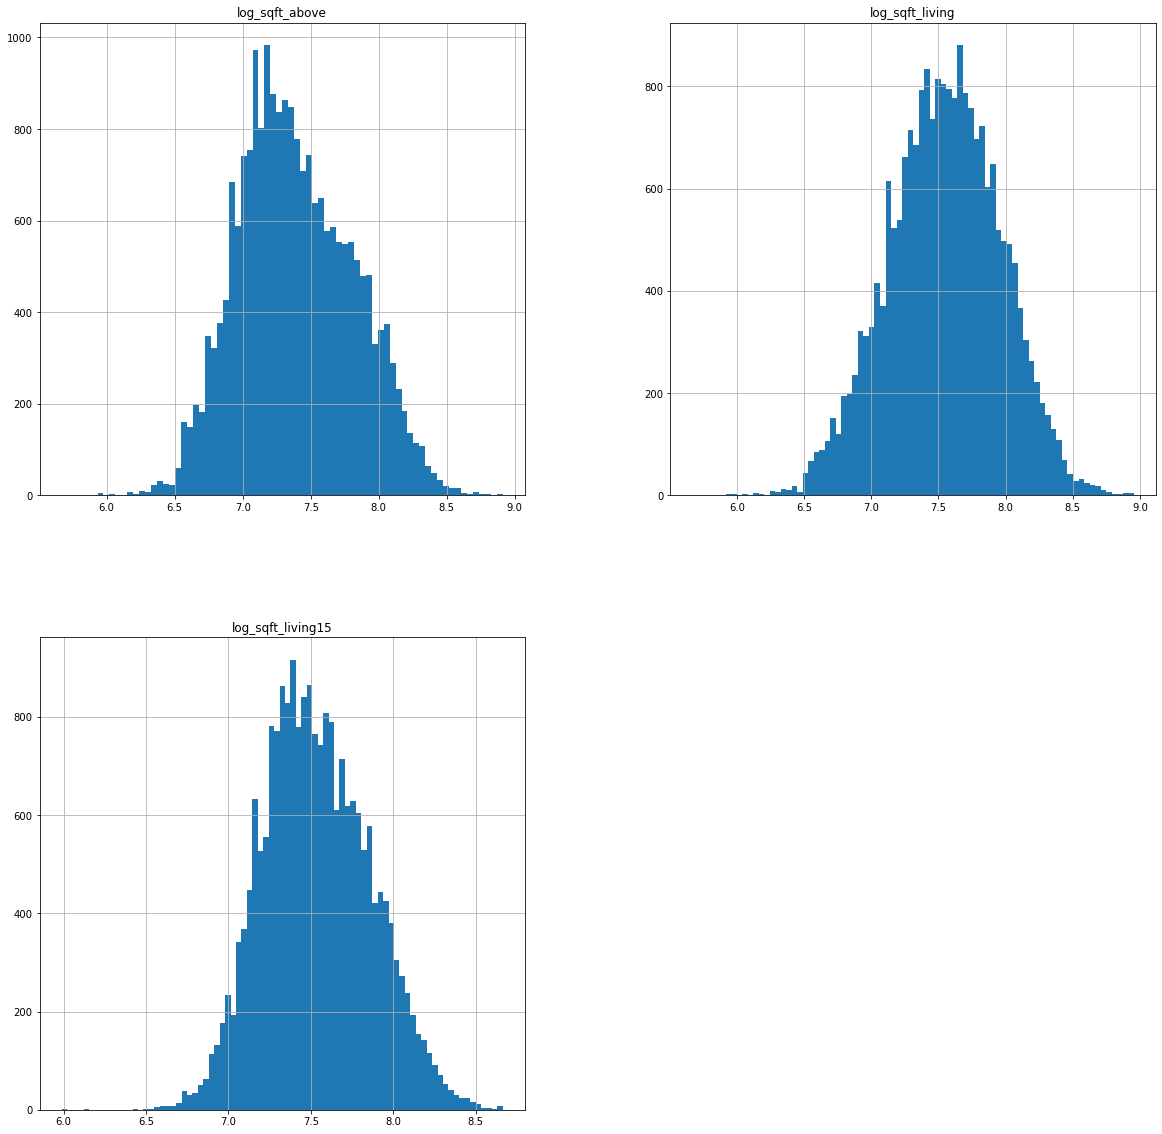

In [1123]:
#sqft_living, sqft_living15 and sqft_above are skewed and will change them to log to assess the distribution
#Price is as well, but I don't want to change price since it is the dependent variable

log_variables = ["log_sqft_above", "log_sqft_living", "log_sqft_living15"]

# log-transforming chosen variables
houses_log[log_variables] = np.log(houses_log[["sqft_above", "sqft_living", "sqft_living15"]])

houses_log[log_variables].hist(bins = "auto", figsize = (20,20));

In [1124]:
houses_log.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,year,month,day,log_sqft_above,log_sqft_living,log_sqft_living15
price,1.000000,0.325513,0.485314,0.682533,0.099015,0.277372,0.162567,0.100436,0.041282,0.680553,...,0.354114,0.036108,0.601474,0.089460,0.006925,-0.016588,-0.013209,0.553881,0.629037,0.570121
bedrooms,0.325513,1.000000,0.493280,0.593515,0.030718,0.180490,-0.019897,0.019915,0.019710,0.363188,...,-0.012563,0.141799,0.401503,0.029465,-0.008618,0.000322,-0.008126,0.527147,0.632107,0.415810
bathrooms,0.485314,0.493280,1.000000,0.698505,0.079819,0.476133,0.026373,0.032010,-0.124239,0.617296,...,0.018949,0.222690,0.525195,0.080598,-0.023821,0.006166,-0.005875,0.646619,0.707832,0.530021
sqft_living,0.682533,0.593515,0.698505,1.000000,0.171965,0.362752,0.045418,0.063290,-0.067636,0.755804,...,0.043707,0.261059,0.758987,0.183941,-0.028409,0.010558,-0.005126,0.850166,0.962019,0.738039
sqft_lot,0.099015,0.030718,0.079819,0.171965,1.000000,-0.007762,0.019780,-0.008158,-0.007390,0.110597,...,-0.087700,0.228699,0.146285,0.733313,0.003737,0.000628,0.000836,0.160129,0.146819,0.146247
floors,0.277372,0.180490,0.476133,0.362752,-0.007762,1.000000,0.014839,-0.024272,-0.266850,0.459341,...,0.047546,0.127913,0.278089,-0.012512,-0.021482,0.013249,-0.005688,0.547129,0.371861,0.272280
waterfront,0.162567,-0.019897,0.026373,0.045418,0.019780,0.014839,1.000000,0.000618,0.018222,0.038274,...,-0.025076,-0.051068,0.048954,0.029394,0.001245,0.002536,0.013262,0.027134,0.039983,0.047433
view,0.100436,0.019915,0.032010,0.063290,-0.008158,-0.024272,0.000618,1.000000,0.021740,0.044881,...,0.017602,-0.064131,0.073966,-0.009303,0.004913,-0.003486,-0.001361,0.019714,0.060722,0.077352
condition,0.041282,0.019710,-0.124239,-0.067636,-0.007390,-0.266850,0.018222,0.021740,1.000000,-0.149908,...,-0.015383,-0.105883,-0.097071,-0.002725,-0.045697,0.021764,-0.004469,-0.152765,-0.055007,-0.091984
grade,0.680553,0.363188,0.617296,0.755804,0.110597,0.459341,0.038274,0.044881,-0.149908,1.000000,...,0.109079,0.207808,0.704720,0.118208,-0.031029,0.007434,-0.011635,0.734960,0.737497,0.681365


In [1125]:
#The log values have a lower corr, so I won't drop the originals right now.  Will try different combinations with ML later

In [1126]:
#Now that I have normalized the data and I have new calendar date variables, I want to explore some analysis with this as well

In [1127]:
# Creating groups to use in analysis
month_group = houses_log.groupby(by=["month"])

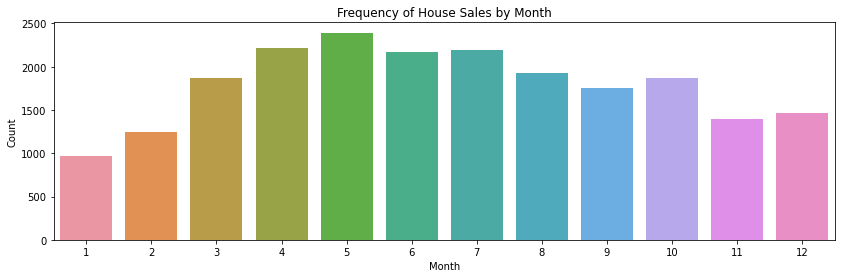

In [1128]:
#I want to look at the distribution of home sales by Month
plt.figure(figsize=(14,4))

month_freq = month_group.size()
month_freq_plot = sns.barplot(x=month_freq.index, y=month_freq.values)
month_freq_plot.set(xlabel = "Month", ylabel = "Count", title = "Frequency of House Sales by Month")
plt.show()

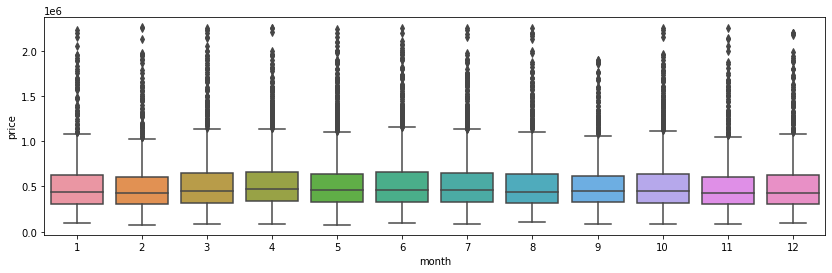

In [1129]:
#I want to look at the distribution of price by month to see any patterns
plt.figure(figsize=(14,4))
ax = sns.boxplot(x = "month", y = "price", data=houses)
plt.show()

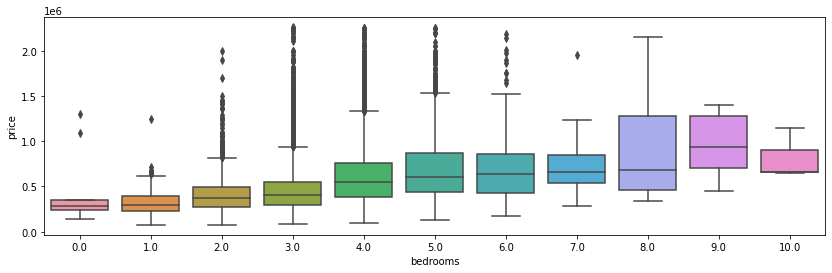

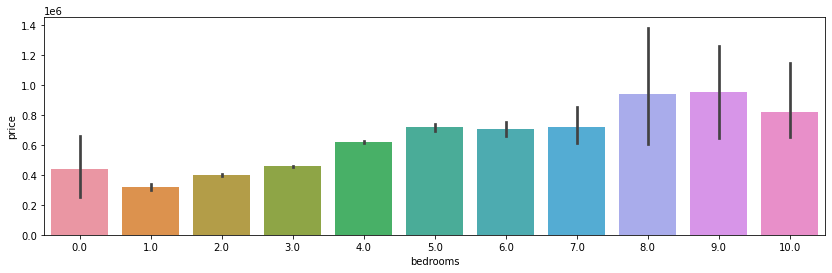

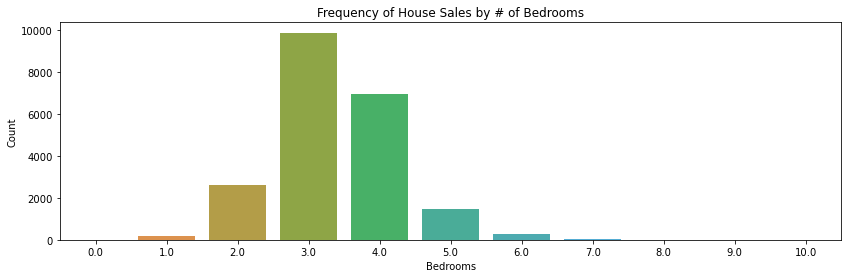

In [1130]:
#I want to explore some other variables: bedrooms
plt.figure(figsize=(14,4))
ax = sns.boxplot(x = "bedrooms", y = "price", data=houses)
plt.show()


plt.figure(figsize=(14,4))
ax = sns.barplot(x = "bedrooms", y = "price", data=houses)
plt.show()


plt.figure(figsize=(14,4))
bed_group = houses_log.groupby(by=["bedrooms"])
bed_freq = bed_group.size()
bed_freq_plot = sns.barplot(x=bed_freq.index, y=bed_freq.values)
bed_freq_plot.set(xlabel = "Bedrooms", ylabel = "Count", title = "Frequency of House Sales by # of Bedrooms")
plt.show()

In [1131]:
#Bedrooms has a weakly positive correlation with price
#Largely grouping: 0-3 have similar prices, 4-7 have similar prices and 8-10 have similar prices
#Interestingly, peak number of sales occurs at 3 bedrooms and then drops off quickly after, almost flat at 6 and beyond

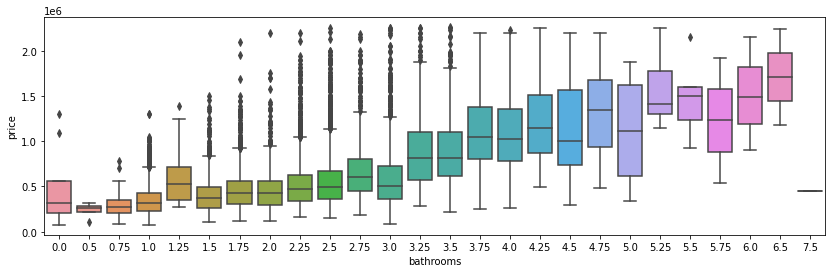

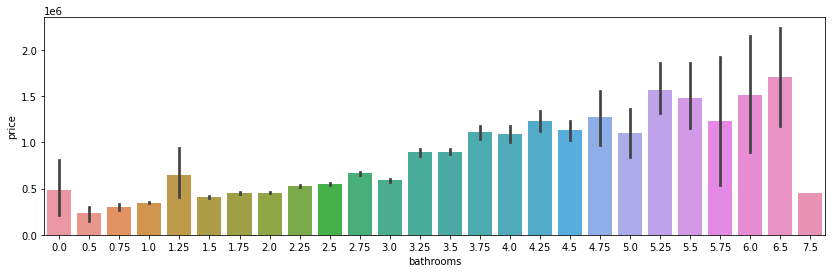

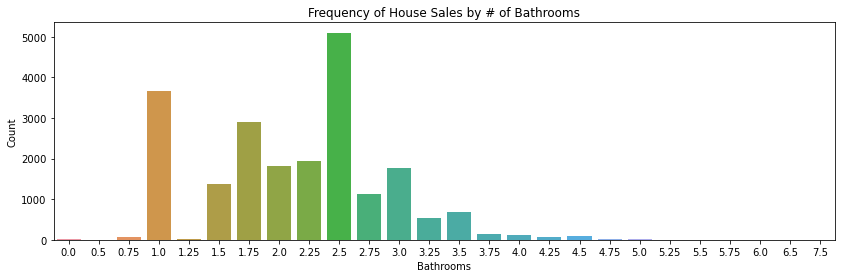

In [1132]:
#I want to explore some other variables: bathrooms
plt.figure(figsize=(14,4))
ax = sns.boxplot(x = "bathrooms", y = "price", data=houses)
plt.show()


plt.figure(figsize=(14,4))
ax = sns.barplot(x = "bathrooms", y = "price", data=houses)
plt.show()


plt.figure(figsize=(14,4))
bath_group = houses_log.groupby(by=["bathrooms"])
bath_freq = bath_group.size()
bath_freq_plot = sns.barplot(x=bath_freq.index, y=bath_freq.values)
bath_freq_plot.set(xlabel = "Bathrooms", ylabel = "Count", title = "Frequency of House Sales by # of Bathrooms")
plt.show()

In [1133]:
#There is a stronger correlation with bathrooms and price, increasing faster at 3 and above
#Looking at the number of sales though, they are primarily in less than 3 bathrooms.  Very few sales above 4 bathrooms

In [1134]:
#Houses with bedrooms between 2-6 and bathrooms 2-6.5 all have outliers at the maximum price.  Will look into this

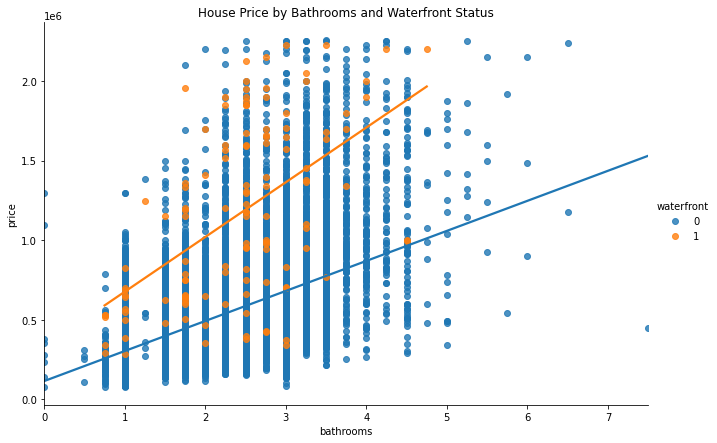

In [1135]:

sns.lmplot(x ="bathrooms", y ="price", hue = "waterfront", data = houses_log, order = 1, ci = None, height=6, aspect=1.5).set(title='House Price by Bathrooms and Waterfront Status')

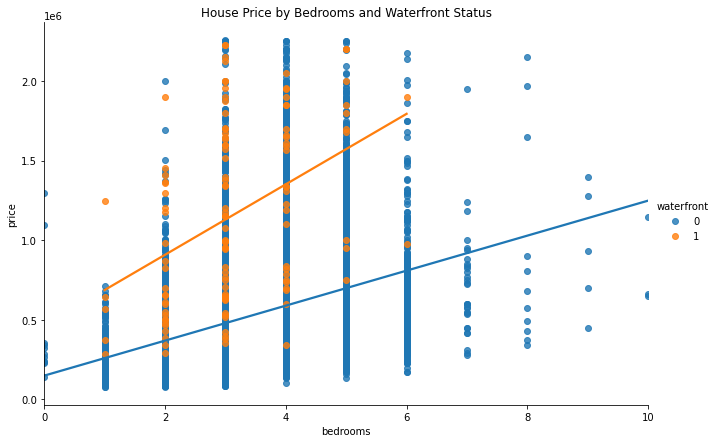

In [1136]:
sns.lmplot(x ="bedrooms", y ="price", hue = "waterfront", data = houses_log, order = 1, ci = None, height=6, aspect=1.5).set(title='House Price by Bedrooms and Waterfront Status')

In [1137]:
#From the above plots, we can see that the elevated prices are driven mainly by waterfront status
#Another interesting aspect is whether a house has been renovated or not

In [1138]:
#I have to create a categorical value and new df for this since I want it to be renovated: 'yes' or 'no':
def renovated(df_row):
    if df_row['yr_renovated'] == 0:
        renovation = 'no'
    else:
        renovation = 'yes'
    return renovation

In [1139]:
houses_log['Renovation'] = houses_log.apply(renovated, axis=1)

<ipython-input-1139-896dac6ab502>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses_log['Renovation'] = houses_log.apply(renovated, axis=1)


In [1140]:
houses_log.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,year,month,day,day_of_week,log_sqft_above,log_sqft_living,log_sqft_living15,Renovation
0,2014-10-13,221900,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3,...,1340,5650,2014,10,13,Monday,7.073270,7.073270,7.200425,no
1,2014-12-09,538000,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3,...,1690,7639,2014,12,9,Tuesday,7.682482,7.851661,7.432484,yes
2,2015-02-25,180000,2.0,1.00,770.0,10000.0,1.0,0,0.0,3,...,2720,8062,2015,2,25,Wednesday,6.646391,6.646391,7.908387,no
3,2014-12-09,604000,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5,...,1360,5000,2014,12,9,Tuesday,6.956545,7.580700,7.215240,no
4,2015-02-18,510000,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3,...,1800,7503,2015,2,18,Wednesday,7.426549,7.426549,7.495542,no


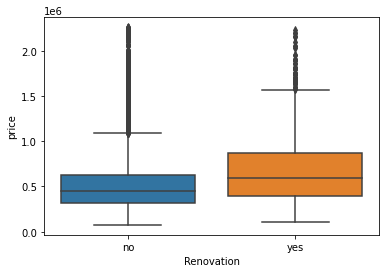

In [1141]:
#I want to explore renovated status and price
plt.figure(figsize=(6,4))
ax = sns.boxplot(x = "Renovation", y = "price", data=houses_log)
plt.show()

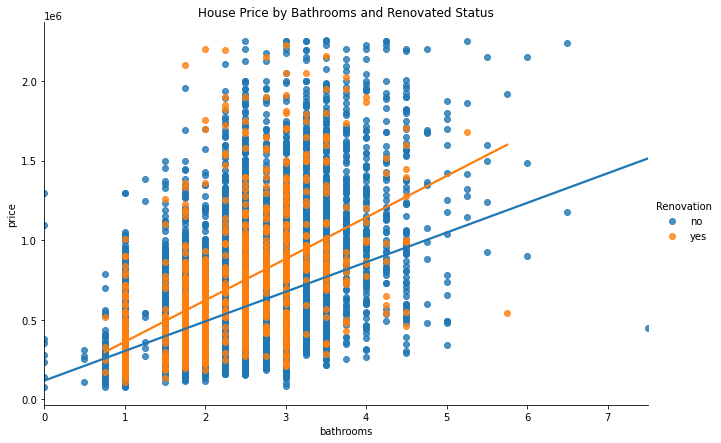

In [1142]:
sns.lmplot(x ="bathrooms", y ="price", hue = "Renovation", data = houses_log, order = 1, ci = None, height=6, aspect=1.5).set(title='House Price by Bathrooms and Renovated Status')

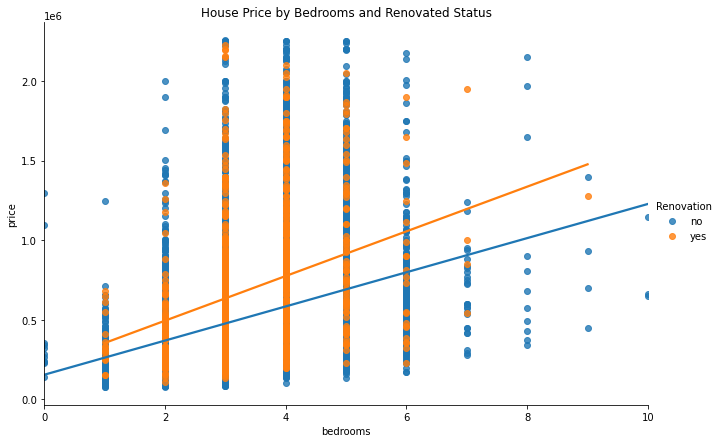

In [1143]:
sns.lmplot(x ="bedrooms", y ="price", hue = "Renovation", data = houses_log, order = 1, ci = None, height=6, aspect=1.5).set(title='House Price by Bedrooms and Renovated Status')

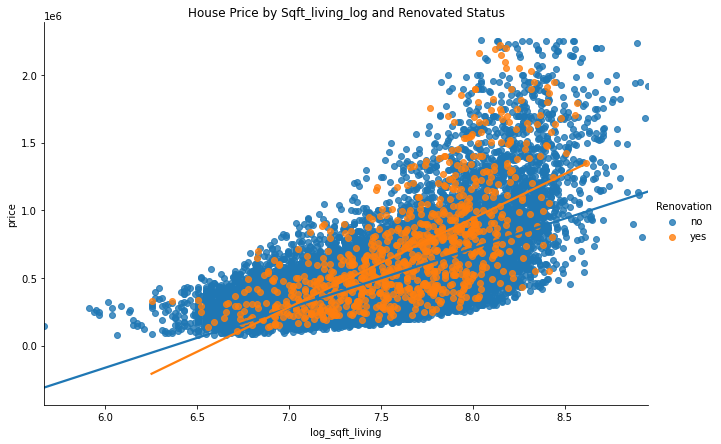

In [1144]:
sns.lmplot(x ="log_sqft_living", y ="price", hue = "Renovation", data = houses_log, order = 1, ci = None, height=6, aspect=1.5).set(title='House Price by Sqft_living_log and Renovated Status')

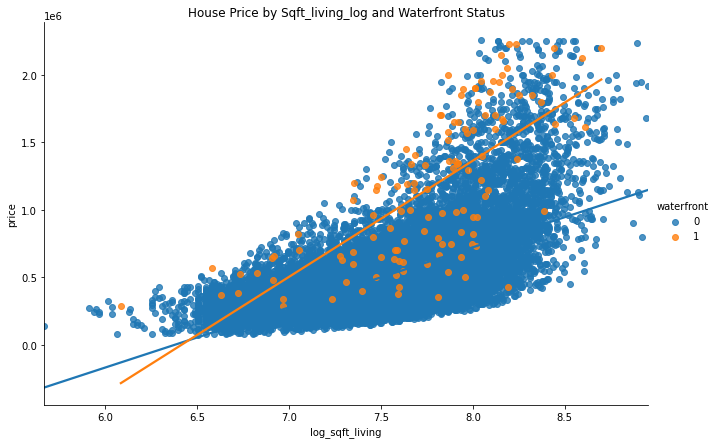

In [1145]:
sns.lmplot(x ="log_sqft_living", y ="price", hue = "waterfront", data = houses_log, order = 1, ci = None, height=6, aspect=1.5).set(title='House Price by Sqft_living_log and Waterfront Status')

In [1146]:
#Renovation status does provide a slightly higher price and it is evenly distributed between # of bathrooms and # of bedrooms
#Renovation status doesn't change price as much as waterfront status based on log_sqft_living

Text(0.5, 1.0, 'Price by Year Built')

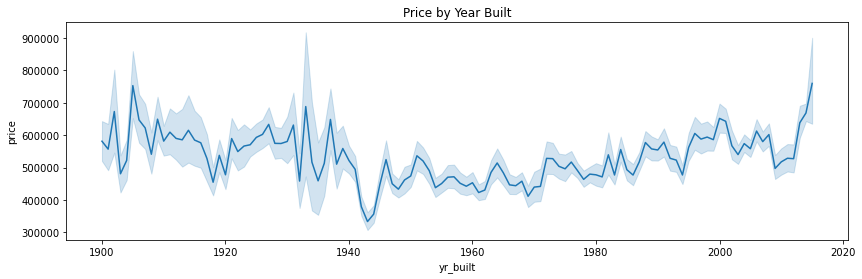

In [1147]:
#I want to evaluate year built as well

plt.figure(figsize=(14,4))
sns.lineplot(x=houses_log['yr_built'], y=houses['price'])
plt.title("Price by Year Built")

In [1148]:
#Interesting that there is a dip in mid-century for price of home sold compared to early century and current date

In [1149]:
#At this point I have a good idea of variables that affect price, can set up for ML now

In [1150]:
houses_log.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,year,month,day,log_sqft_above,log_sqft_living,log_sqft_living15
price,1.000000,0.325513,0.485314,0.682533,0.099015,0.277372,0.162567,0.100436,0.041282,0.680553,...,0.354114,0.036108,0.601474,0.089460,0.006925,-0.016588,-0.013209,0.553881,0.629037,0.570121
bedrooms,0.325513,1.000000,0.493280,0.593515,0.030718,0.180490,-0.019897,0.019915,0.019710,0.363188,...,-0.012563,0.141799,0.401503,0.029465,-0.008618,0.000322,-0.008126,0.527147,0.632107,0.415810
bathrooms,0.485314,0.493280,1.000000,0.698505,0.079819,0.476133,0.026373,0.032010,-0.124239,0.617296,...,0.018949,0.222690,0.525195,0.080598,-0.023821,0.006166,-0.005875,0.646619,0.707832,0.530021
sqft_living,0.682533,0.593515,0.698505,1.000000,0.171965,0.362752,0.045418,0.063290,-0.067636,0.755804,...,0.043707,0.261059,0.758987,0.183941,-0.028409,0.010558,-0.005126,0.850166,0.962019,0.738039
sqft_lot,0.099015,0.030718,0.079819,0.171965,1.000000,-0.007762,0.019780,-0.008158,-0.007390,0.110597,...,-0.087700,0.228699,0.146285,0.733313,0.003737,0.000628,0.000836,0.160129,0.146819,0.146247
floors,0.277372,0.180490,0.476133,0.362752,-0.007762,1.000000,0.014839,-0.024272,-0.266850,0.459341,...,0.047546,0.127913,0.278089,-0.012512,-0.021482,0.013249,-0.005688,0.547129,0.371861,0.272280
waterfront,0.162567,-0.019897,0.026373,0.045418,0.019780,0.014839,1.000000,0.000618,0.018222,0.038274,...,-0.025076,-0.051068,0.048954,0.029394,0.001245,0.002536,0.013262,0.027134,0.039983,0.047433
view,0.100436,0.019915,0.032010,0.063290,-0.008158,-0.024272,0.000618,1.000000,0.021740,0.044881,...,0.017602,-0.064131,0.073966,-0.009303,0.004913,-0.003486,-0.001361,0.019714,0.060722,0.077352
condition,0.041282,0.019710,-0.124239,-0.067636,-0.007390,-0.266850,0.018222,0.021740,1.000000,-0.149908,...,-0.015383,-0.105883,-0.097071,-0.002725,-0.045697,0.021764,-0.004469,-0.152765,-0.055007,-0.091984
grade,0.680553,0.363188,0.617296,0.755804,0.110597,0.459341,0.038274,0.044881,-0.149908,1.000000,...,0.109079,0.207808,0.704720,0.118208,-0.031029,0.007434,-0.011635,0.734960,0.737497,0.681365


In [1151]:
#I'm going to start by using a linear regression model using a list of features:
features = ["log_sqft_living","log_sqft_living15","log_sqft_above","bathrooms","bedrooms","view","floors","waterfront","lat","sqft_basement","grade"] 

In [1152]:
#Linear Regression model
Y = houses_log['price']
lr = LinearRegression()
lr.fit(houses_log[features], Y)

print("Predicted values: " + str(lr.predict(houses_log[features])))

print("The R^2 value is: " + str(lr.score(houses_log[features], Y)))

Predicted values: [321010.58989485 613197.62894618 372643.85915697 ... 326501.11863688
 479736.8855591  326309.29054491]
The R^2 value is: 0.631920911879224


In [1153]:
#Train a model to evaluate with 85% train:
X = houses_log[features]
Y = houses_log['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

#shapes of splitted data
print("x_train:",x_train.shape)
print("y_test:",x_test.shape)
print("y_train:",y_train.shape[0])
print("y_test:",y_test.shape[0])


x_train: (18246, 11)
y_test: (3221, 11)
y_train: 18246
y_test: 3221


In [1154]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [1155]:
y_pred=linreg.predict(x_test)
y_pred

array([401152.72845495, 362547.60067637, 325846.63311296, ...,
       408336.5283865 , 389780.72210785, 290586.85368945])

In [1156]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 63.17


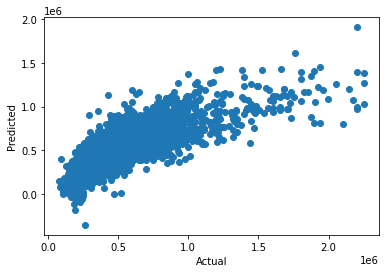

In [1157]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

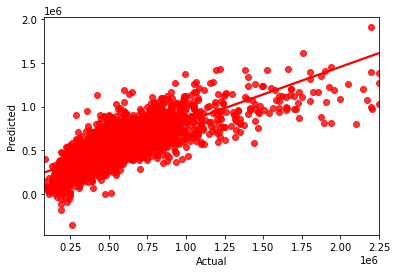

In [1158]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [1159]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [1160]:
pred_df

,Actual Value,Predicted Value,Difference
19585,312500,401152.728455,-88652.728455
7075,350000,362547.600676,-12547.600676
12724,130000,325846.633113,-195846.633113
17998,216000,281555.844026,-65555.844026
8350,330000,334138.777987,-4138.777987
...,...,...,...
19308,475000,470217.831995,4782.168005
5124,245000,241006.376764,3993.623236
4749,319000,408336.528386,-89336.528386
19581,340768,389780.722108,-49012.722108


In [1161]:
houses.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,year,month,day,log_sqft_above,log_sqft_living,log_sqft_living15
price,1.000000,0.325513,0.485314,0.682533,0.099015,0.277372,0.162567,0.100436,0.041282,0.680553,...,0.354114,0.036108,0.601474,0.089460,0.006925,-0.016588,-0.013209,0.553881,0.629037,0.570121
bedrooms,0.325513,1.000000,0.493280,0.593515,0.030718,0.180490,-0.019897,0.019915,0.019710,0.363188,...,-0.012563,0.141799,0.401503,0.029465,-0.008618,0.000322,-0.008126,0.527147,0.632107,0.415810
bathrooms,0.485314,0.493280,1.000000,0.698505,0.079819,0.476133,0.026373,0.032010,-0.124239,0.617296,...,0.018949,0.222690,0.525195,0.080598,-0.023821,0.006166,-0.005875,0.646619,0.707832,0.530021
sqft_living,0.682533,0.593515,0.698505,1.000000,0.171965,0.362752,0.045418,0.063290,-0.067636,0.755804,...,0.043707,0.261059,0.758987,0.183941,-0.028409,0.010558,-0.005126,0.850166,0.962019,0.738039
sqft_lot,0.099015,0.030718,0.079819,0.171965,1.000000,-0.007762,0.019780,-0.008158,-0.007390,0.110597,...,-0.087700,0.228699,0.146285,0.733313,0.003737,0.000628,0.000836,0.160129,0.146819,0.146247
floors,0.277372,0.180490,0.476133,0.362752,-0.007762,1.000000,0.014839,-0.024272,-0.266850,0.459341,...,0.047546,0.127913,0.278089,-0.012512,-0.021482,0.013249,-0.005688,0.547129,0.371861,0.272280
waterfront,0.162567,-0.019897,0.026373,0.045418,0.019780,0.014839,1.000000,0.000618,0.018222,0.038274,...,-0.025076,-0.051068,0.048954,0.029394,0.001245,0.002536,0.013262,0.027134,0.039983,0.047433
view,0.100436,0.019915,0.032010,0.063290,-0.008158,-0.024272,0.000618,1.000000,0.021740,0.044881,...,0.017602,-0.064131,0.073966,-0.009303,0.004913,-0.003486,-0.001361,0.019714,0.060722,0.077352
condition,0.041282,0.019710,-0.124239,-0.067636,-0.007390,-0.266850,0.018222,0.021740,1.000000,-0.149908,...,-0.015383,-0.105883,-0.097071,-0.002725,-0.045697,0.021764,-0.004469,-0.152765,-0.055007,-0.091984
grade,0.680553,0.363188,0.617296,0.755804,0.110597,0.459341,0.038274,0.044881,-0.149908,1.000000,...,0.109079,0.207808,0.704720,0.118208,-0.031029,0.007434,-0.011635,0.734960,0.737497,0.681365


In [1162]:
#My best R^2 is about 65%.  I will try with fewer variables and without log values to test

In [1163]:
features2 = ["sqft_living","sqft_living15","sqft_above","grade"] 

In [1164]:
#Linear Regression model2
Y = houses_log['price']
lr2 = LinearRegression()
lr2.fit(houses_log[features2], Y)

print("Predicted values: " + str(lr2.predict(houses_log[features2])))

print("The R^2 value is: " + str(lr2.score(houses_log[features2], Y)))

Predicted values: [327125.32817618 499626.03442376 253594.95946395 ... 297501.34591706
 470527.61139252 297501.34591706]
The R^2 value is: 0.5410283478173306


In [1165]:
#Train a model to evaluate with 85% train:
X = houses_log[features2]
Y = houses_log['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

#shapes of splitted data
print("x_train:",x_train.shape)
print("y_test:",x_test.shape)
print("y_train:",y_train.shape[0])
print("y_test:",y_test.shape[0])

x_train: (18246, 4)
y_test: (3221, 4)
y_train: 18246
y_test: 3221


In [1166]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [1167]:
y_pred=linreg.predict(x_test)
y_pred

array([302426.05056613, 353863.04264496, 324232.18902745, ...,
       305321.44157226, 495454.5834125 , 423126.03630668])

In [1168]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 52.80


In [1169]:
#This accuracy is even lower so I am not goint to plot it.  Will try will all variables like before except without log
features3 = ["sqft_living","sqft_living15","sqft_above","bathrooms","bedrooms","view","floors","waterfront","lat","sqft_basement","grade"] 

In [1170]:
#Linear Regression model3
Y = houses_log['price']
lr3 = LinearRegression()
lr3.fit(houses_log[features3], Y)

print("Predicted values: " + str(lr3.predict(houses_log[features3])))

print("The R^2 value is: " + str(lr3.score(houses_log[features3], Y)))

Predicted values: [302718.91014038 628857.92339703 383318.1138291  ... 332490.62141392
 441028.00528656 332299.63476847]
The R^2 value is: 0.6484103889539856


In [1171]:
#Train a model to evaluate with 85% train:
X = houses_log[features3]
Y = houses_log['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

#shapes of splitted data
print("x_train:",x_train.shape)
print("y_test:",x_test.shape)
print("y_train:",y_train.shape[0])
print("y_test:",y_test.shape[0])

x_train: (18246, 11)
y_test: (3221, 11)
y_train: 18246
y_test: 3221


In [1172]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [1173]:
y_pred=linreg.predict(x_test)
y_pred

array([397040.21549073, 330480.69100105, 304232.95203923, ...,
       399630.96207223, 346943.61196977, 303555.59020112])

In [1174]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 65.21


In [1175]:
#This model with more variables and log dropped is higher; I will add even more variables to see if I can increase accuracy
features4 = ["sqft_living","sqft_living15","sqft_above","bathrooms","bedrooms","view","floors","waterfront","lat","sqft_basement","grade", "sqft_lot", "condition", "yr_built", "yr_renovated"] 

In [1176]:
#Linear Regression model4
Y = houses_log['price']
lr4 = LinearRegression()
lr4.fit(houses_log[features4], Y)

print("Predicted values: " + str(lr4.predict(houses_log[features4])))

print("The R^2 value is: " + str(lr4.score(houses_log[features4], Y)))

Predicted values: [277288.95104396 697928.91519157 401086.75059459 ... 199498.59002988
 395201.72572275 201795.66490807]
The R^2 value is: 0.698889664135581


In [1177]:
#Train a model to evaluate with 85% train:
X = houses_log[features4]
Y = houses_log['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

#shapes of splitted data
print("x_train:",x_train.shape)
print("y_test:",x_test.shape)
print("y_train:",y_train.shape[0])
print("y_test:",y_test.shape[0])

x_train: (18246, 15)
y_test: (3221, 15)
y_train: 18246
y_test: 3221


In [1178]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [1179]:
y_pred=linreg.predict(x_test)
y_pred

array([306061.48784774, 396664.94282982, 416593.87093976, ...,
       387809.57991656, 396760.42507296, 341259.97105606])

In [1180]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 70.22


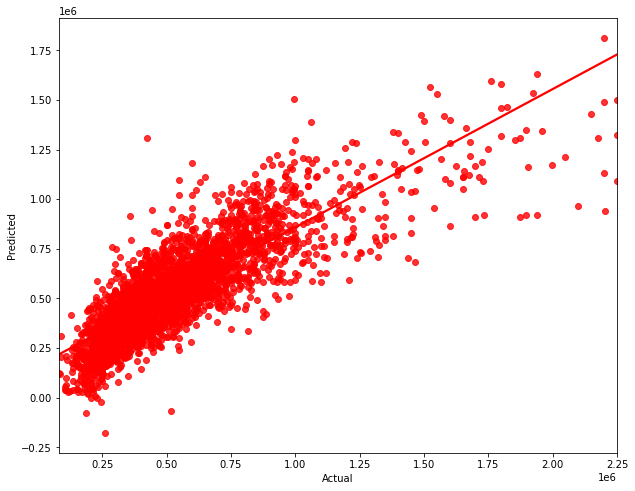

In [1181]:
plt.figure(figsize=(10,8))
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.xlabel('Actual');
plt.ylabel('Predicted');

C:\Users\barry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\barry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


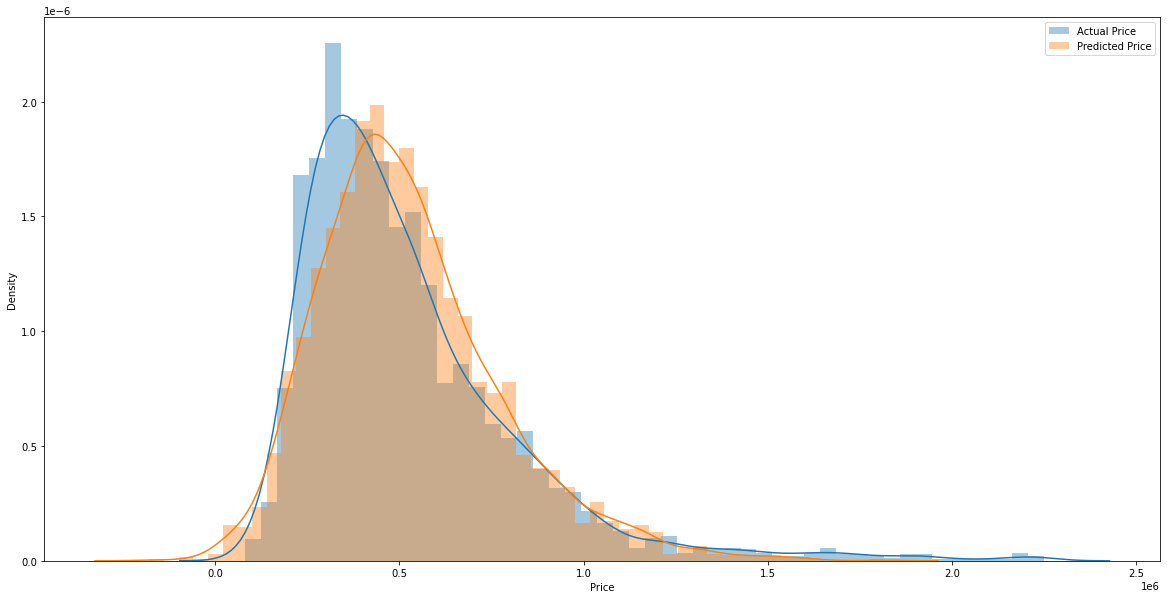

In [1182]:
# Plot distribution of predictions
f, ax = plt.subplots(figsize=(20, 10)) 
sns.distplot(y_test, hist=True, label="Actual Price")
sns.distplot(y_pred, hist=True, label="Predicted Price")
plt.xlabel("Price")
plt.legend()
plt.show()

In [1183]:
#After reading about random forrest plots in our assigned reading, I will try this to see if it improves performance
#I will start with the features2 dataset to get acquainted with the algorithm


In [1184]:
X = houses_log[features2]
Y = houses_log['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [1185]:
#shapes of splitted data
print("x_train:",x_train.shape)
print("y_test:",x_test.shape)
print("y_train:",y_train.shape[0])
print("y_test:",y_test.shape[0])

x_train: (17173, 4)
y_test: (4294, 4)
y_train: 17173
y_test: 4294


In [1186]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [1187]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 50.37


In [1188]:
#This R^2 is the lowest I have achieved yet, I will try will the features4 dataset and more estimators to see how that compares

In [1189]:
X = houses_log[features4]
Y = houses_log['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [1190]:
#shapes of splitted data
print("x_train:",x_train.shape)
print("y_test:",x_test.shape)
print("y_train:",y_train.shape[0])
print("y_test:",y_test.shape[0])

x_train: (17173, 15)
y_test: (4294, 15)
y_train: 17173
y_test: 4294


In [1191]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [1192]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 83.20


In [1193]:
#This is my highest R^2 score yet, I will try with more estimators to see how it improves
regressor = RandomForestRegressor(n_estimators=250, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [1194]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 83.31


In [1195]:
#The increase in estimators by 2.5x did not really improve accuracy very much, this is probably my max accuracy

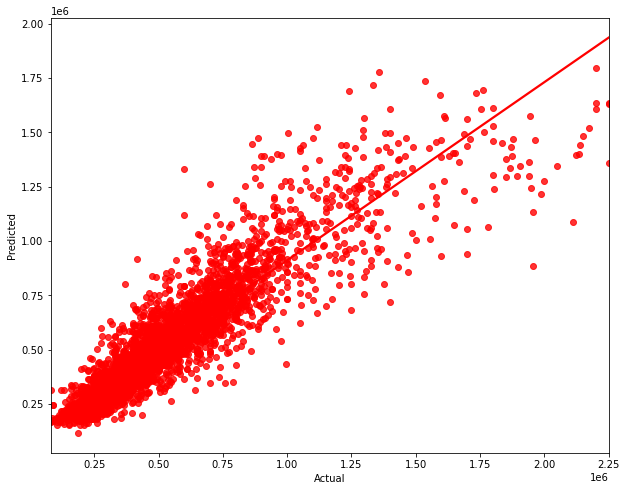

In [1196]:
plt.figure(figsize=(10,8))
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.xlabel('Actual');
plt.ylabel('Predicted');

C:\Users\barry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\barry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


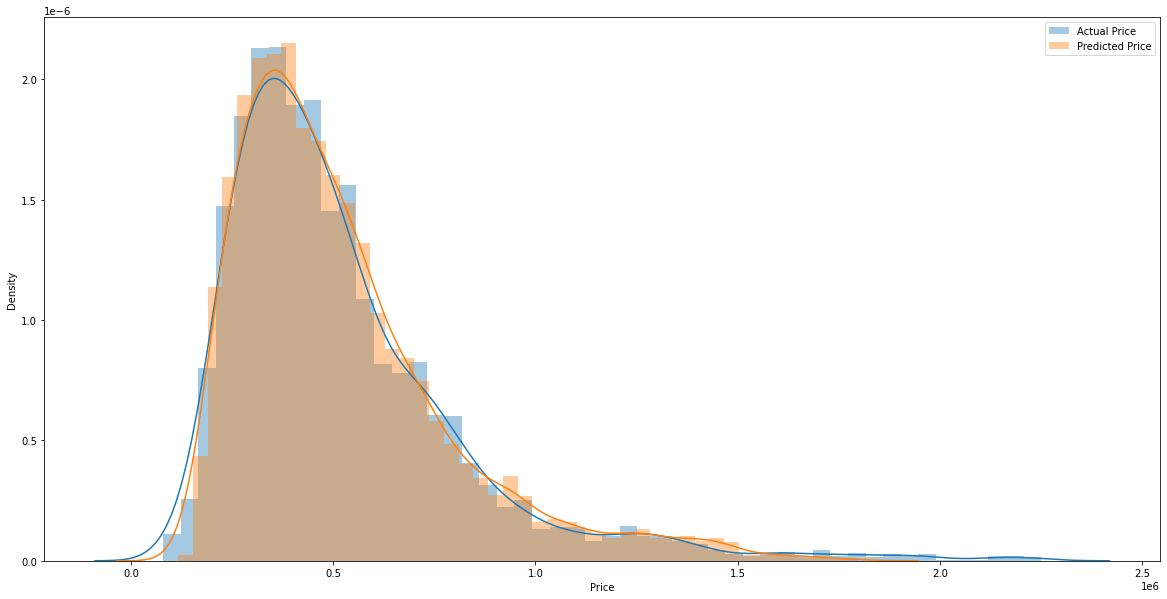

In [1197]:
# Plot distribution of predictions
f, ax = plt.subplots(figsize=(20, 10)) 
sns.distplot(y_test, hist=True, label="Actual Price")
sns.distplot(y_pred, hist=True, label="Predicted Price")
plt.xlabel("Price")
plt.legend()
plt.show()